# 1 数据预处理
 

In [74]:
import pandas as pd  # 数据处理
import numpy as np  # 数学运算
from collections import Counter, defaultdict
from sklearn.model_selection import train_test_split, cross_validate  # 划分数据集函数
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # 准确率函数
import matplotlib.pyplot as plt  # 作图
import seaborn as sns  # 作图
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score


In [75]:
data_df = pd.read_csv("1.csv")
data_df = data_df.drop(columns="gameId")


In [76]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   float64
 13  blu

In [77]:
features =  data_df.columns[1:]
data_df1 = data_df.copy()
data_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   float64
 13  blu

In [78]:
data_df1 = data_df1.drop(columns=["redGoldDiff",'redExperienceDiff','redCSPerMin', 'redGoldPerMin','redFirstBlood',"redDeaths","redKills"])

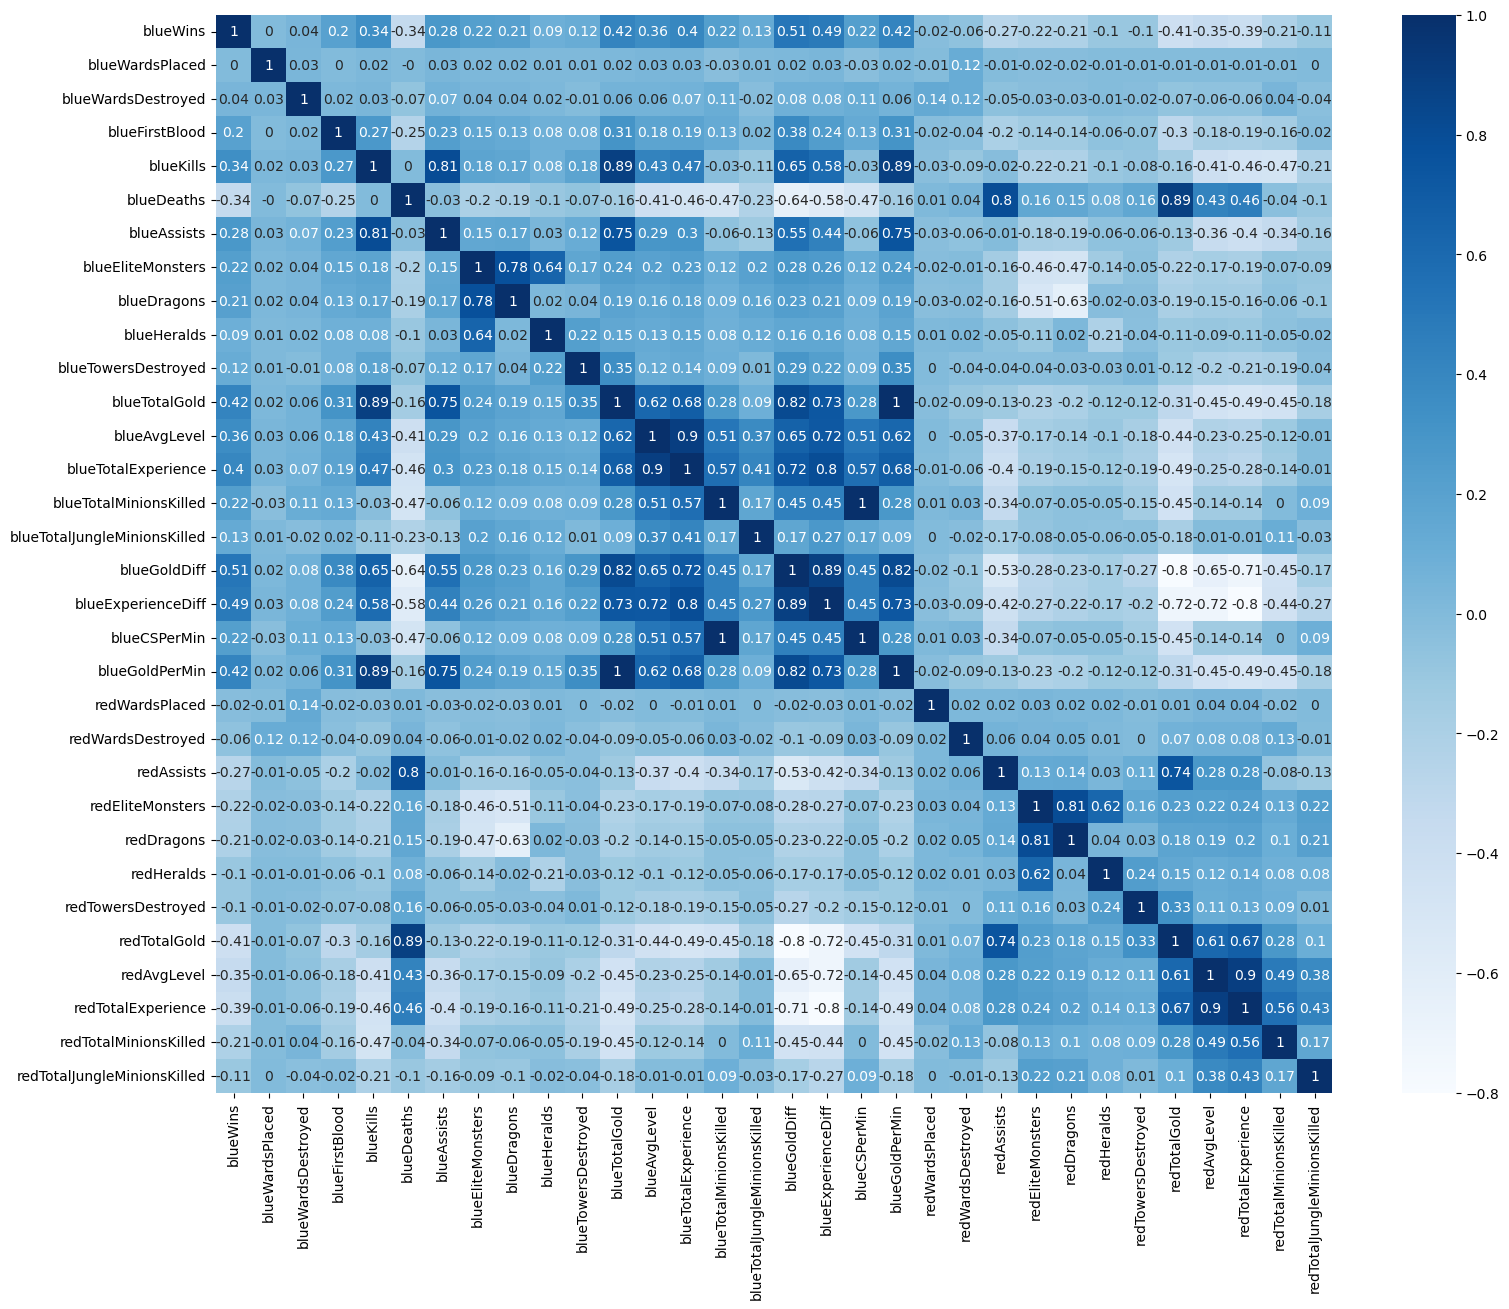

In [79]:
# 绘制热力图，删除共线性较大的变量
plt.figure(figsize=(18, 14))
sns.heatmap(round(data_df1.corr(), 2), cmap='Blues', annot=True)
plt.show() 


In [86]:
row_indices, col_indices = np.where(np.abs(data_df1.corr()) >= 0.88)
col_set= set()
for row, col in zip(row_indices, col_indices):
    if row != col:
        col_set.add(data_df1.columns[col])
        
for i in col_set:
    data_df1 = data_df1.drop(i,axis=1)
# 算出要删除的是那行


In [87]:
print(data_df1.shape)

(9879, 20)


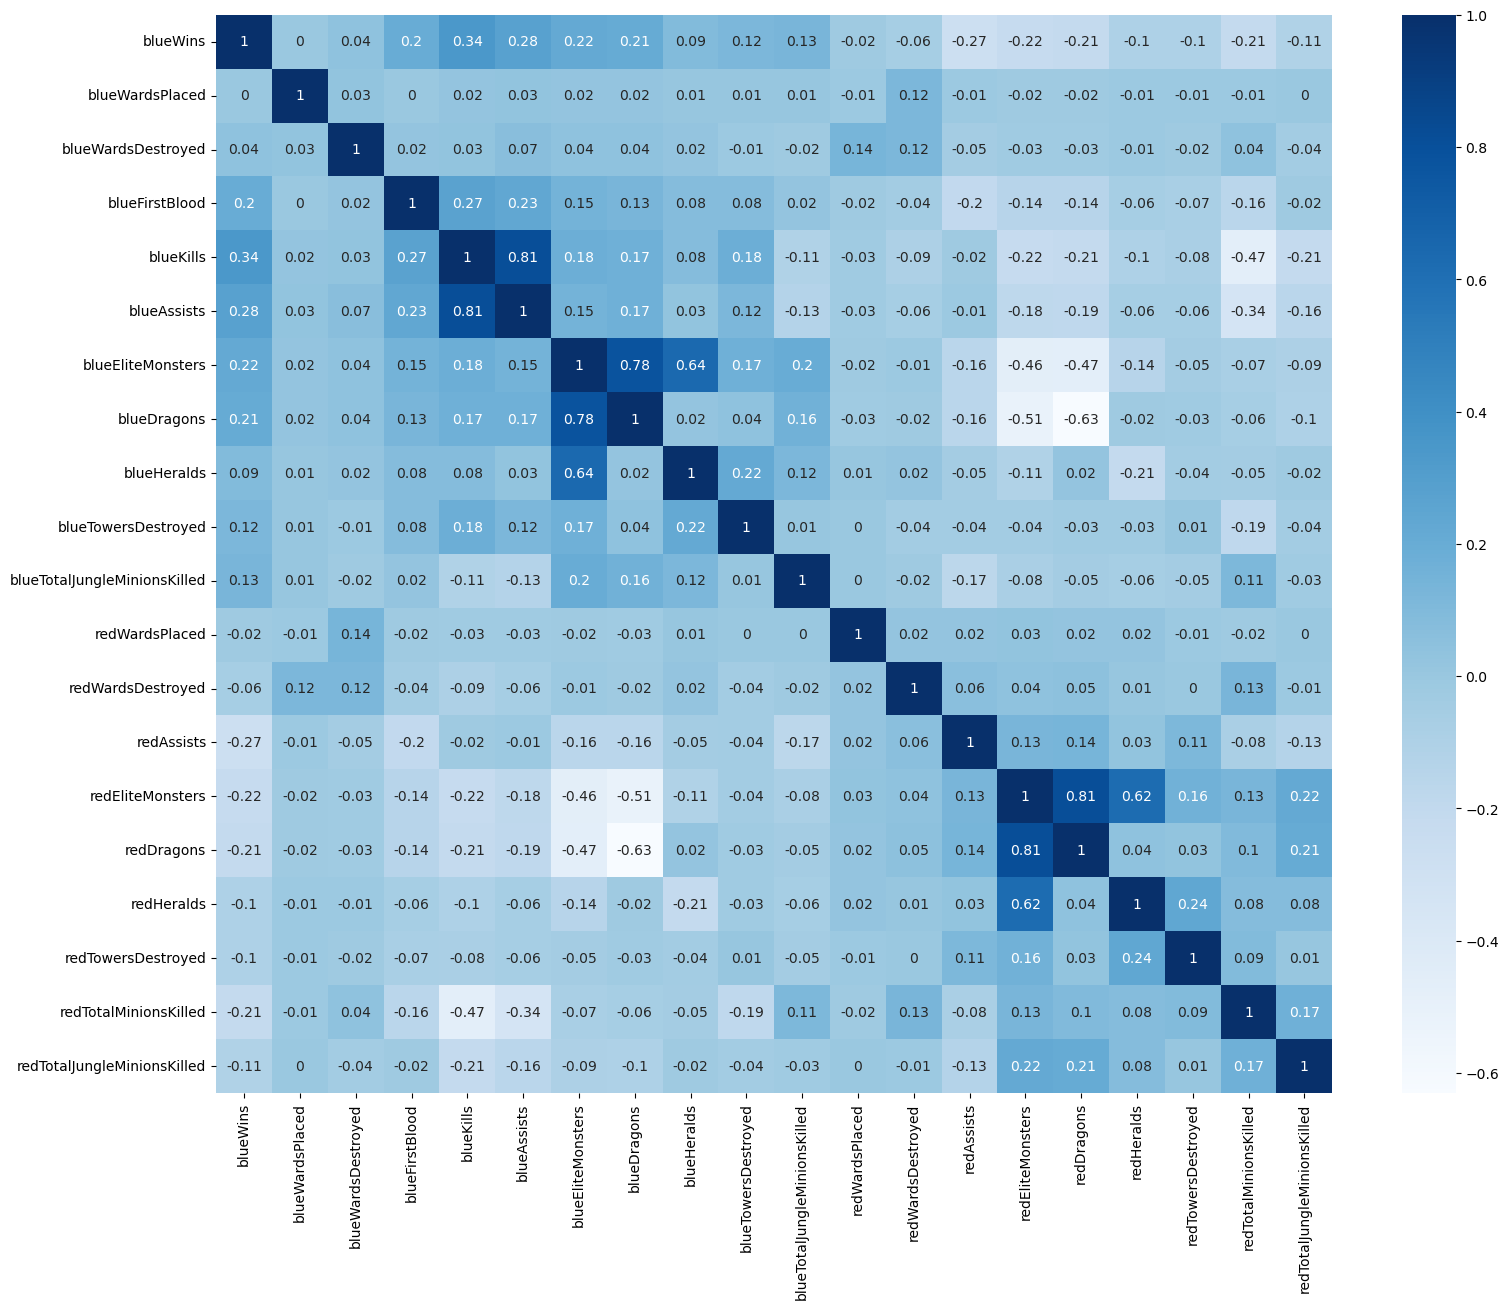

In [88]:
plt.figure(figsize=(18, 14))
sns.heatmap(round(data_df1.corr(), 2), cmap='Blues', annot=True)
plt.show() 

# 2 数据处理

In [96]:
#  根据共线性图删除目标后  直接寻找最佳参数
from sklearn.preprocessing import StandardScaler
feature_names = data_df1.columns[1:]
all_x = data_df1[feature_names].values

all_y = data_df['blueWins'].values
scaler1 = StandardScaler()
scaler2 = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(all_x, all_y, test_size=0.2, random_state=42)
x_train = scaler1.fit_transform(x_train)
x_test =  scaler2.fit_transform(x_test)
print(x_train.shape)

(7903, 19)


In [97]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
#  1 根据共线性图删除目标后  直接寻找最佳参数

parameters = {
    'splitter': ('best', 'random'),
    'criterion': ('gini', 'entropy'),
    'max_depth': [*range(1, 10, 1)],
}

clf = DecisionTreeClassifier(random_state=0)
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(x_train, y_train)
print("best score: ", GS.best_score_)
print("best param: ", GS.best_params_)

best score:  0.6736734465265888
best param:  {'criterion': 'entropy', 'max_depth': 7, 'splitter': 'random'}


In [98]:
best_clf = DecisionTreeClassifier(
    criterion="entropy", max_depth=7, splitter="random")
best_clf.fit(x_train, y_train)
print("score:", best_clf.score(x_test, y_test))
# 输出分类报告
y_pred = best_clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print('Classification report : \n', cr)

score: 0.6831983805668016
Classification report : 
               precision    recall  f1-score   support

           0       0.66      0.76      0.70       983
           1       0.72      0.61      0.66       993

    accuracy                           0.68      1976
   macro avg       0.69      0.68      0.68      1976
weighted avg       0.69      0.68      0.68      1976

